# Visualizing Results for Coefficient 2

This script solely displays the results of the main test that have already computed and stored in an extern folder. For the interpretation and discussions, we refer to the thesis. 

In [1]:
import os
import sys
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from visualize import *
from data import *
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MultipleLocator
import csv

## Preparations

<IPython.core.display.Javascript object>


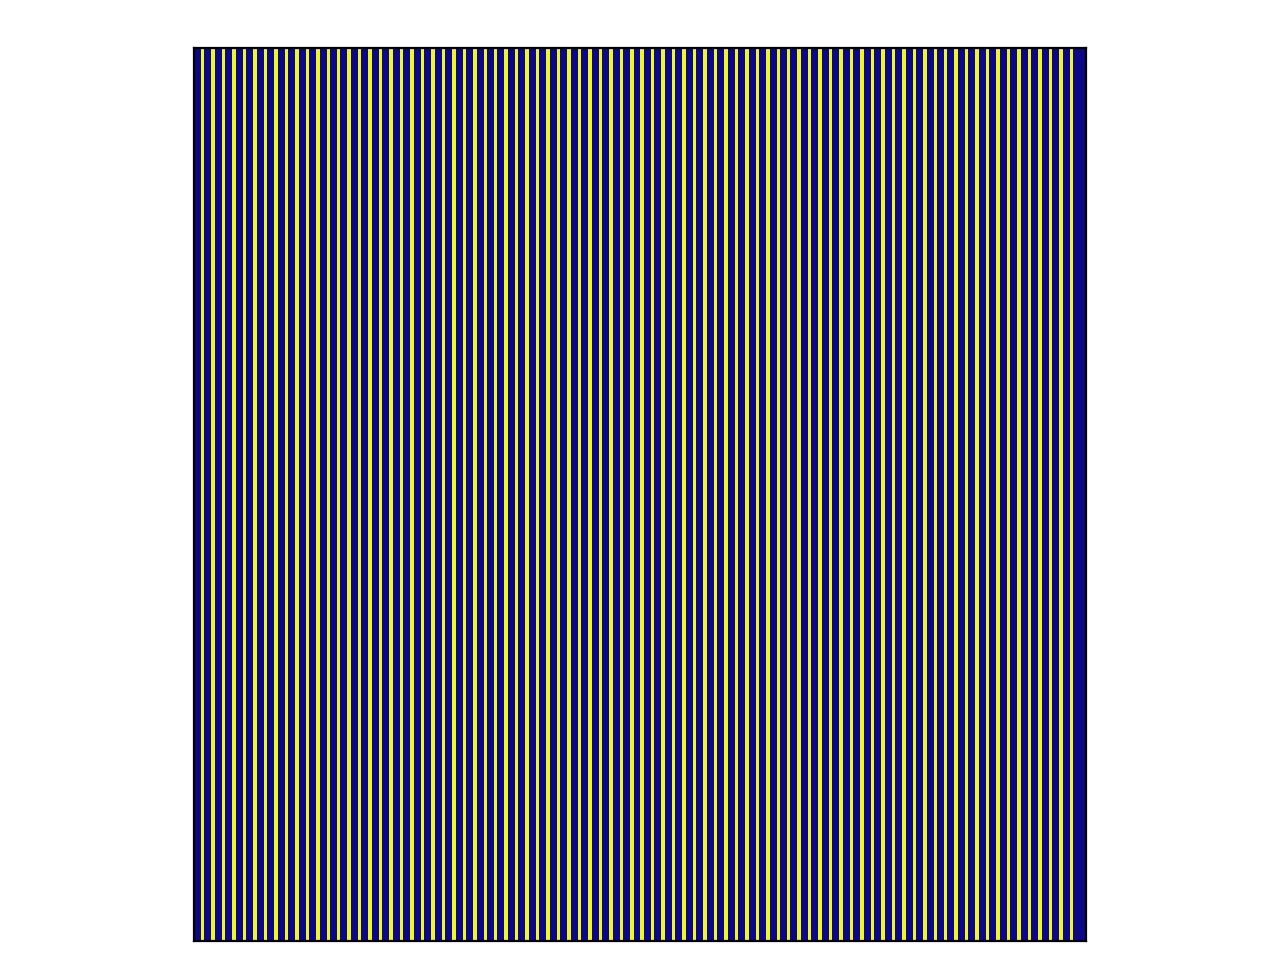

<IPython.core.display.Javascript object>


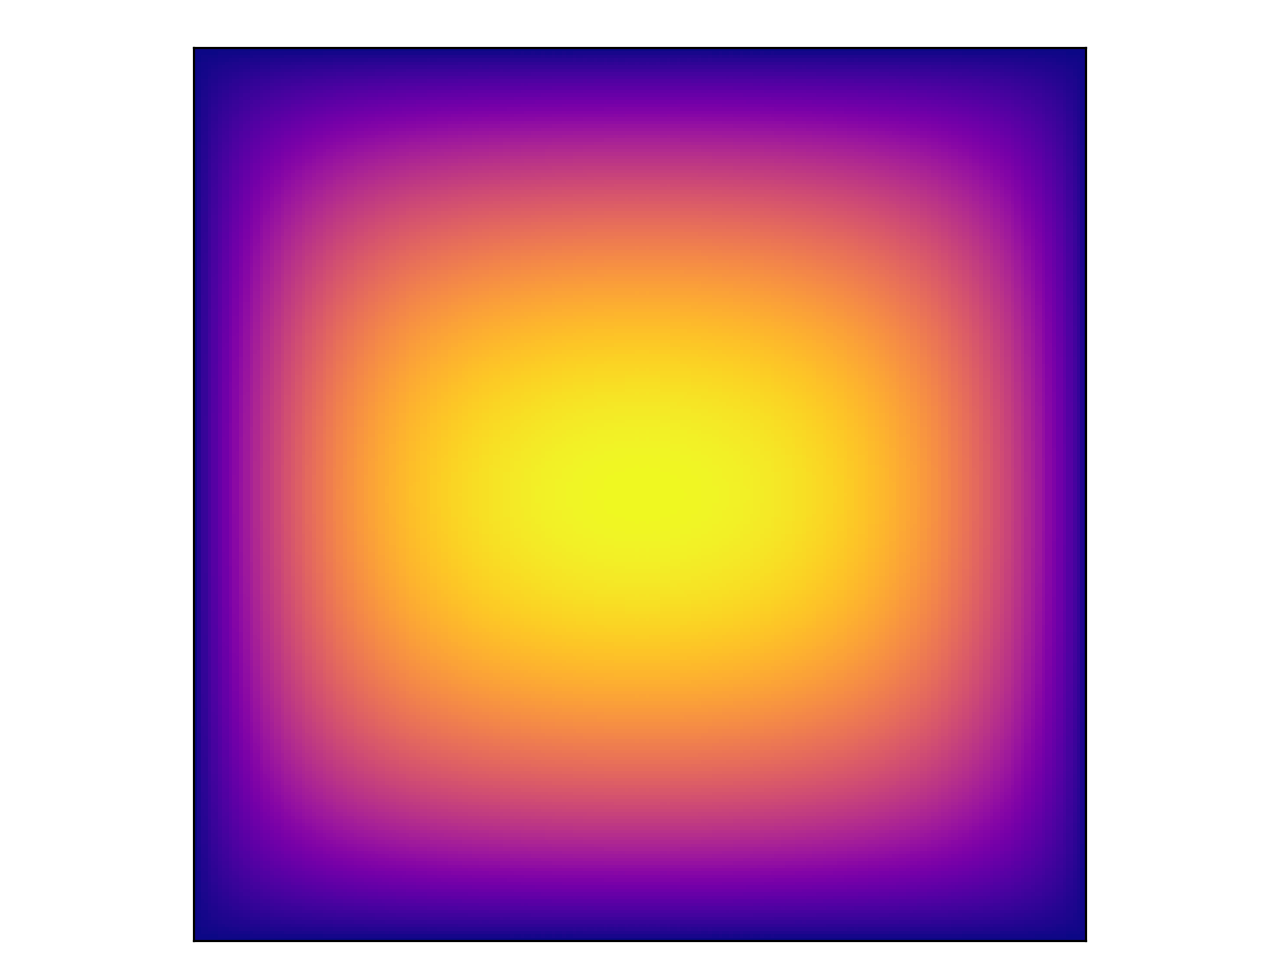

In [2]:
NWorldFine = np.array([256, 256])
NpFine = np.prod(NWorldFine+1)                                                                               

#coarse World
NWorldCoarse = np.array([16,16])
NpCoarse = np.prod(NWorldCoarse+1)

#ratio between Fine and Coarse
NCoarseElement = NWorldFine/NWorldCoarse

ROOT = '../test_data/Coef2'

OriginalCoeff = []
f = open("%s/OriginalCoeff.txt" % ROOT, 'rb')
reader = csv.reader(f)
for row in reader:
    OriginalCoeff.append(float(row[0])) 
f.close()

Abase = np.array([])
Abase = np.append(Abase,OriginalCoeff)

finescale = []
f = open("%s/finescale.txt" % ROOT, 'rb')
reader = csv.reader(f)
for row in reader:
    finescale.append(float(row[0])) 
f.close()

ufine = np.array([])
ufine = np.append(ufine,finescale)

plt.figure("Original")
drawCoefficient(NWorldFine, Abase)

plt.figure("Solution")
drawCoefficient(NWorldFine+1,ufine)

plt.show()

## Getting data

In [3]:
# Change in value
C1Base, C1eps, C1errorbest, C1errorplotinfo, C1errorworst, C1vis, C1recomputefractionsafe = RegainChange(ROOT)

# Disappearance
VBase, Veps, Verrorbest, Verrorplotinfo, Verrorworst, Vvis, Vrecomputefractionsafe = RegainVanish(ROOT)

# Shift
M1Base, M1eps, M1errorbest, M1errorplotinfo, M1errorworst, M1vis, M1recomputefractionsafe = RegainShift(ROOT)

## Plotting data

### Change in value

<IPython.core.display.Javascript object>


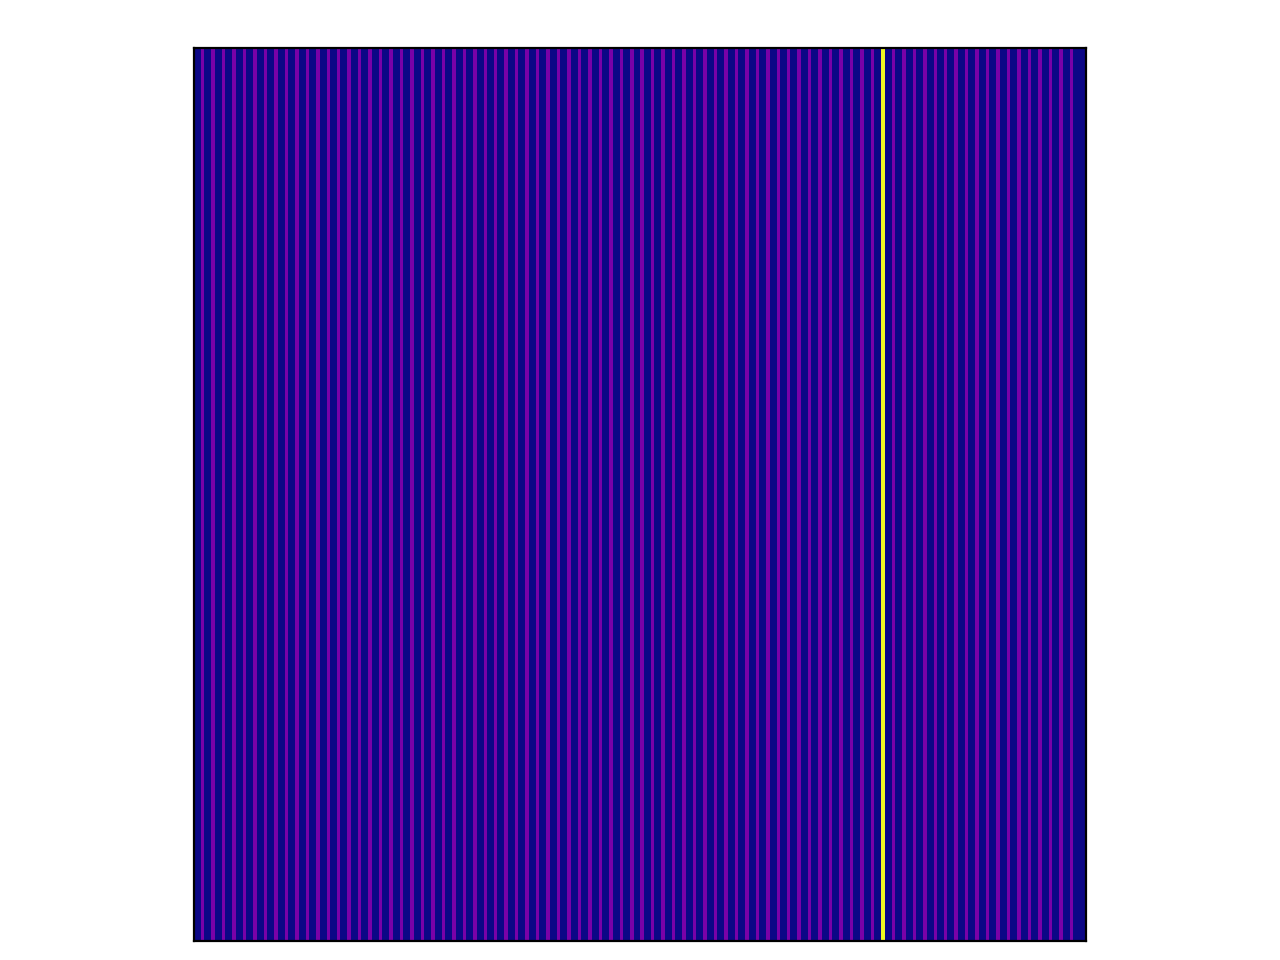

<IPython.core.display.Javascript object>


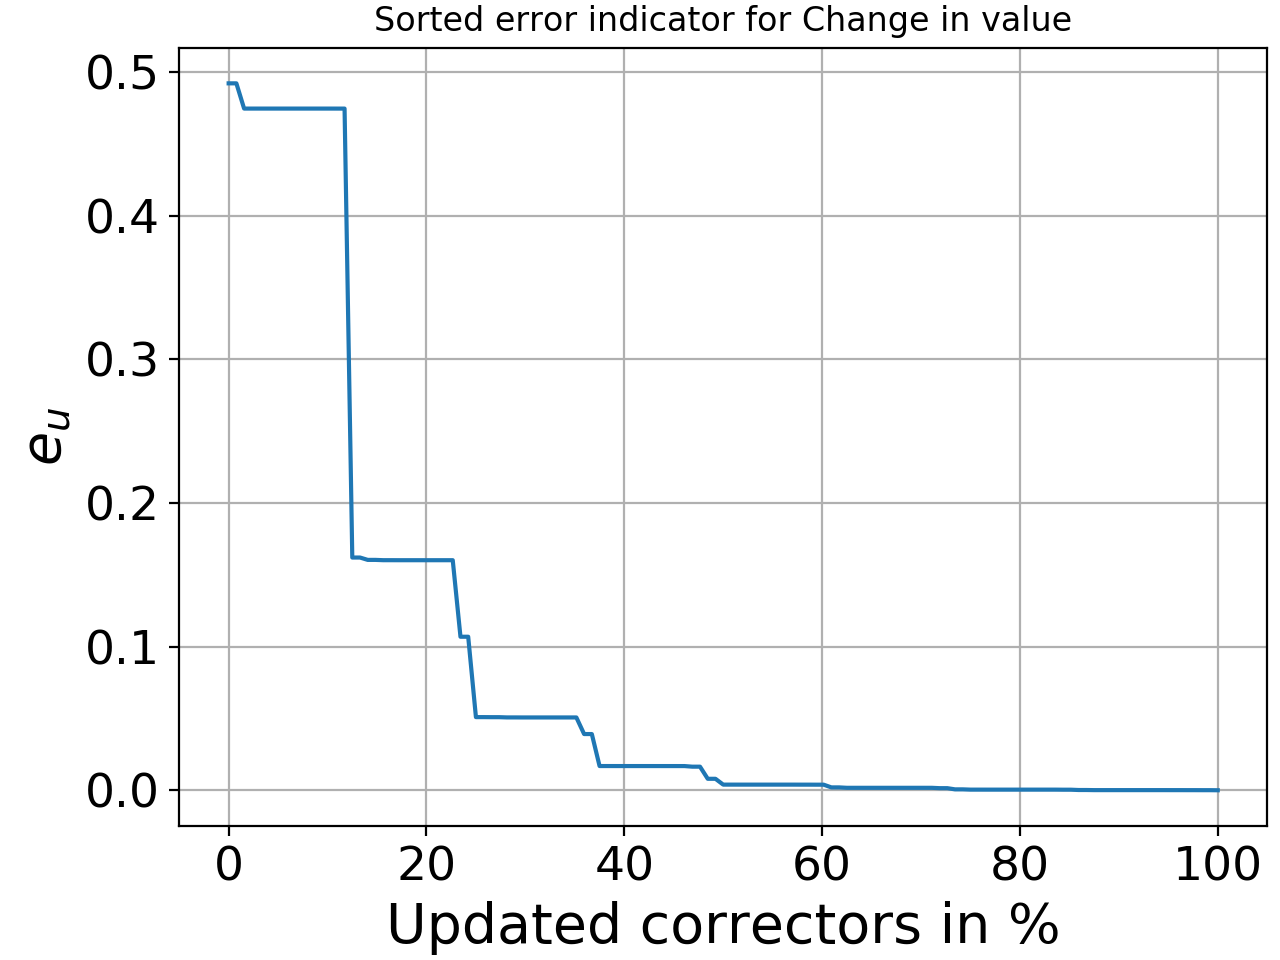

<IPython.core.display.Javascript object>


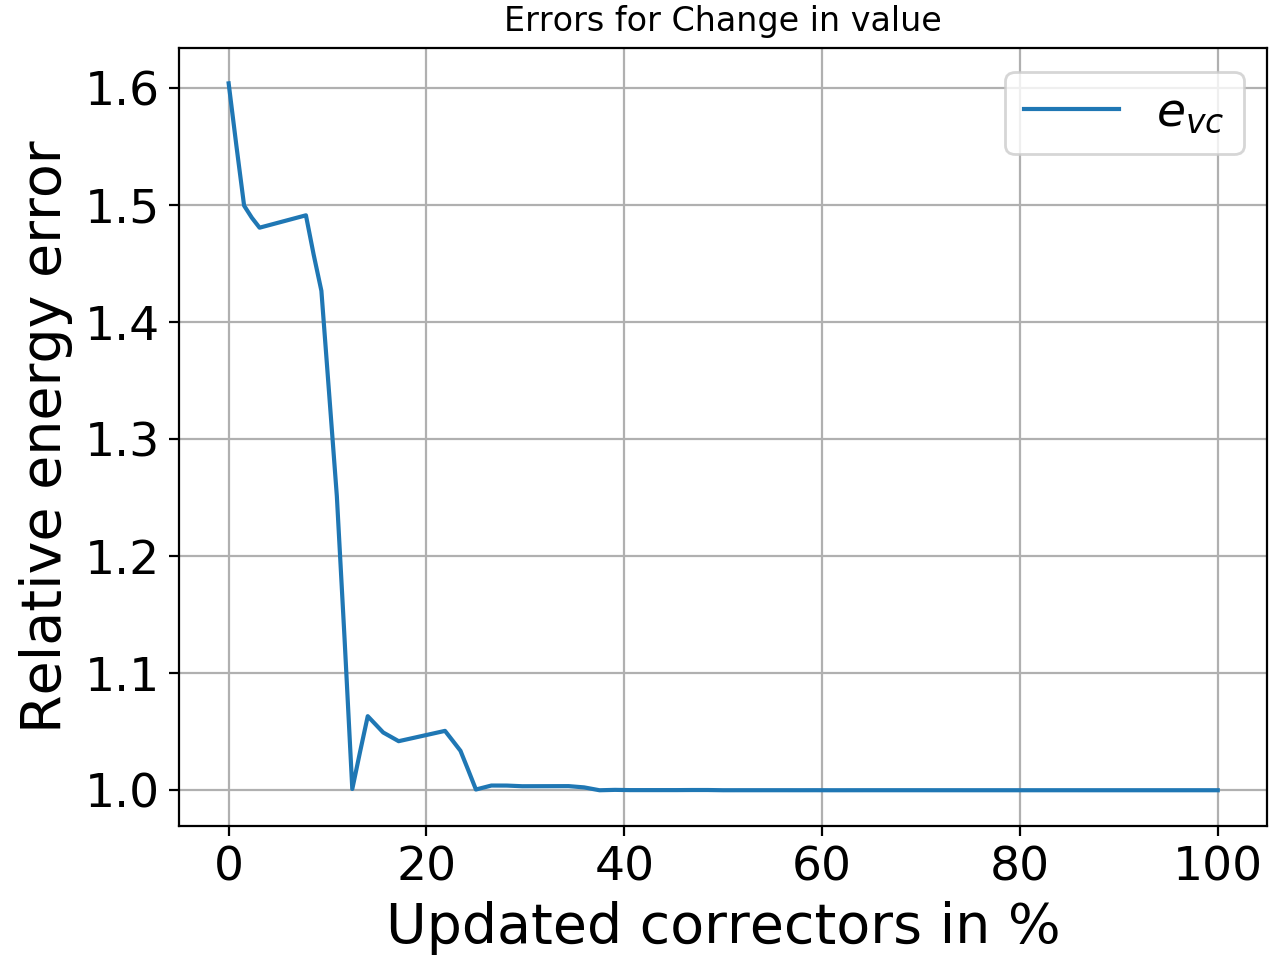

In [4]:
# Perturbation
Er = np.array([])
Er = np.append(Er,C1Base)
plt.figure("Coefficient for Change in value")
drawCoefficient(NWorldFine, Er)
plt.show()

# Error indicator plot
plot_error_indicator(C1eps,C1recomputefractionsafe, NWorldCoarse,'Change in value')

# PGLOD error plot
plot_VCLOD_error(C1errorbest, C1errorworst, C1errorplotinfo, C1recomputefractionsafe,'Change in value')
plt.show()

### Disappearance

<IPython.core.display.Javascript object>


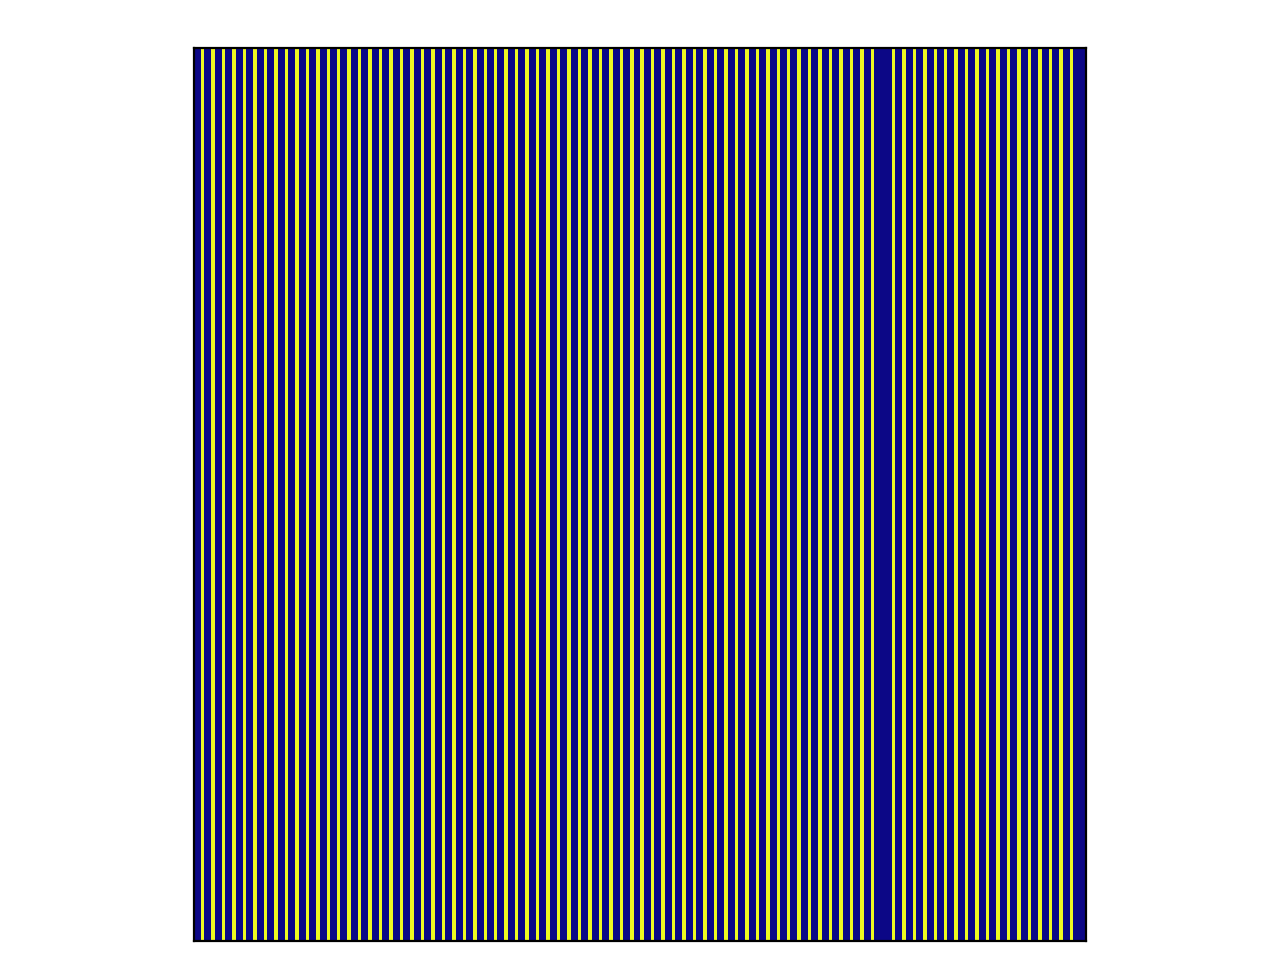

<IPython.core.display.Javascript object>


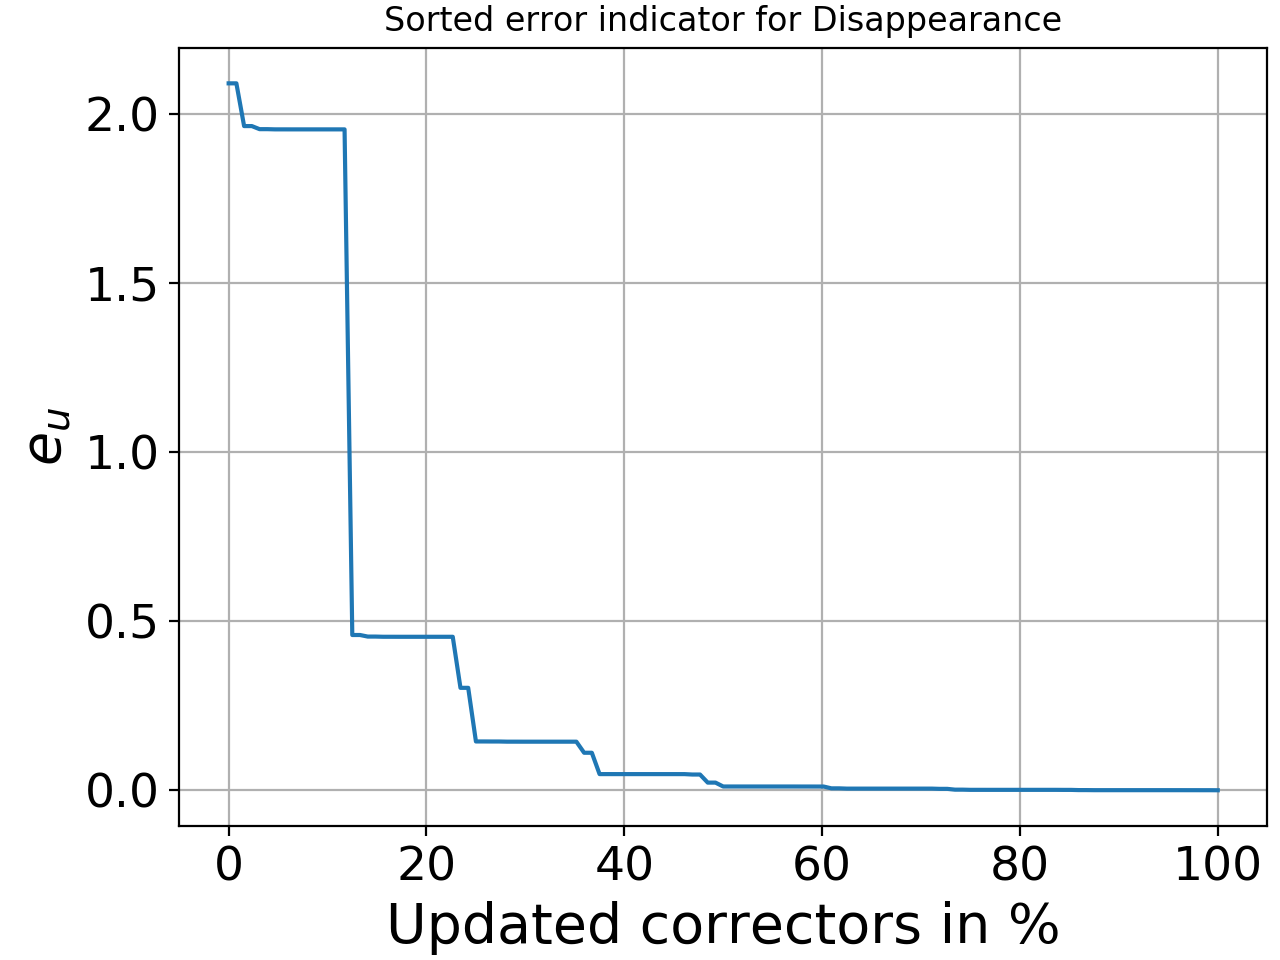

<IPython.core.display.Javascript object>


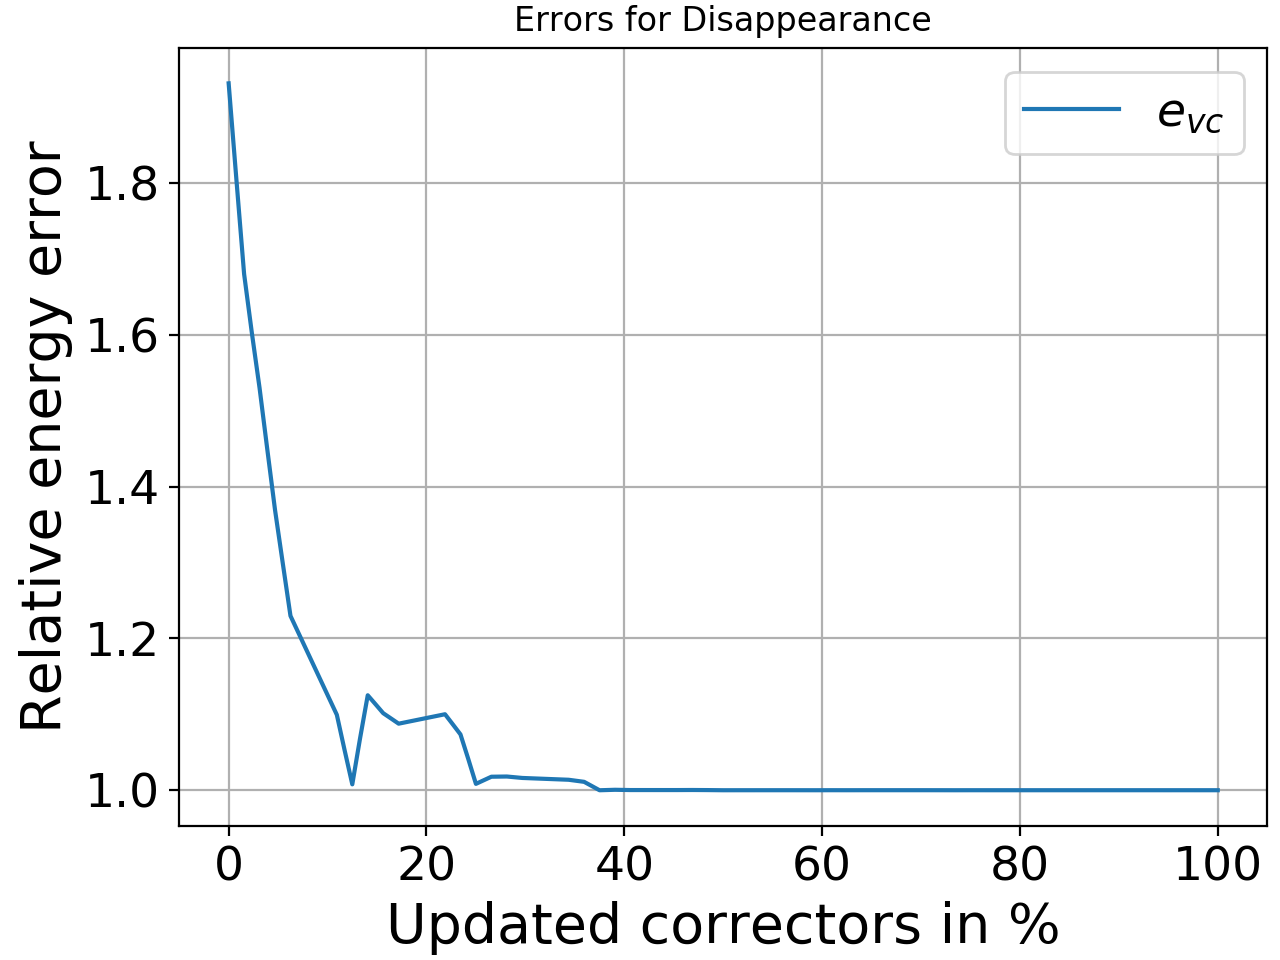

In [5]:
# Perturbation
Er = np.array([])
Er = np.append(Er,VBase)
plt.figure("Coefficient for Disappearance")
drawCoefficient(NWorldFine, Er)
plt.show()

# Error indicator plot
plot_error_indicator(Veps,Vrecomputefractionsafe, NWorldCoarse, 'Disappearance')

# PGLOD error plot
plot_VCLOD_error(Verrorbest, Verrorworst, Verrorplotinfo, Vrecomputefractionsafe,'Disappearance')

### Shift

<IPython.core.display.Javascript object>


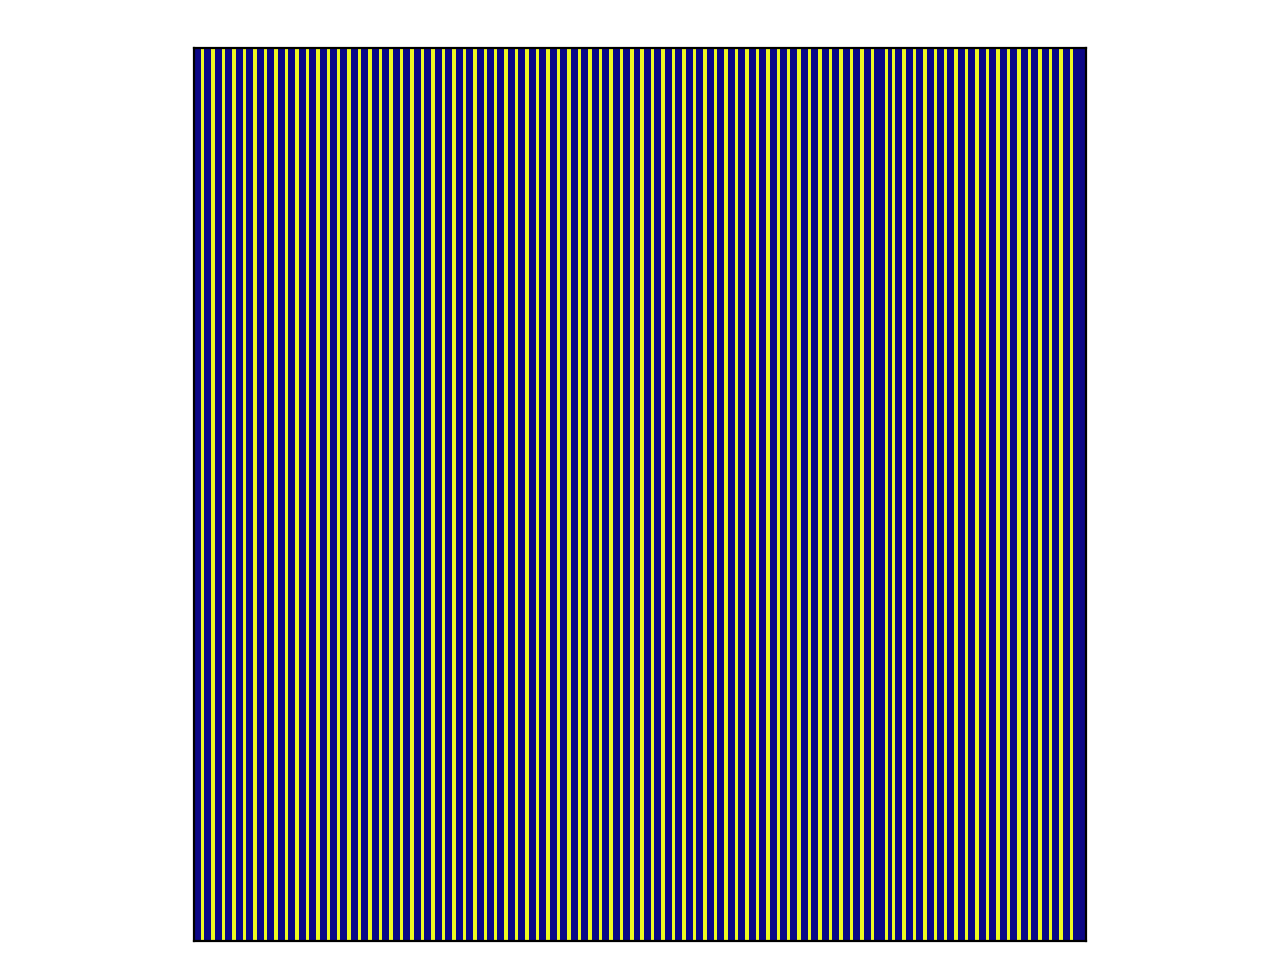

<IPython.core.display.Javascript object>


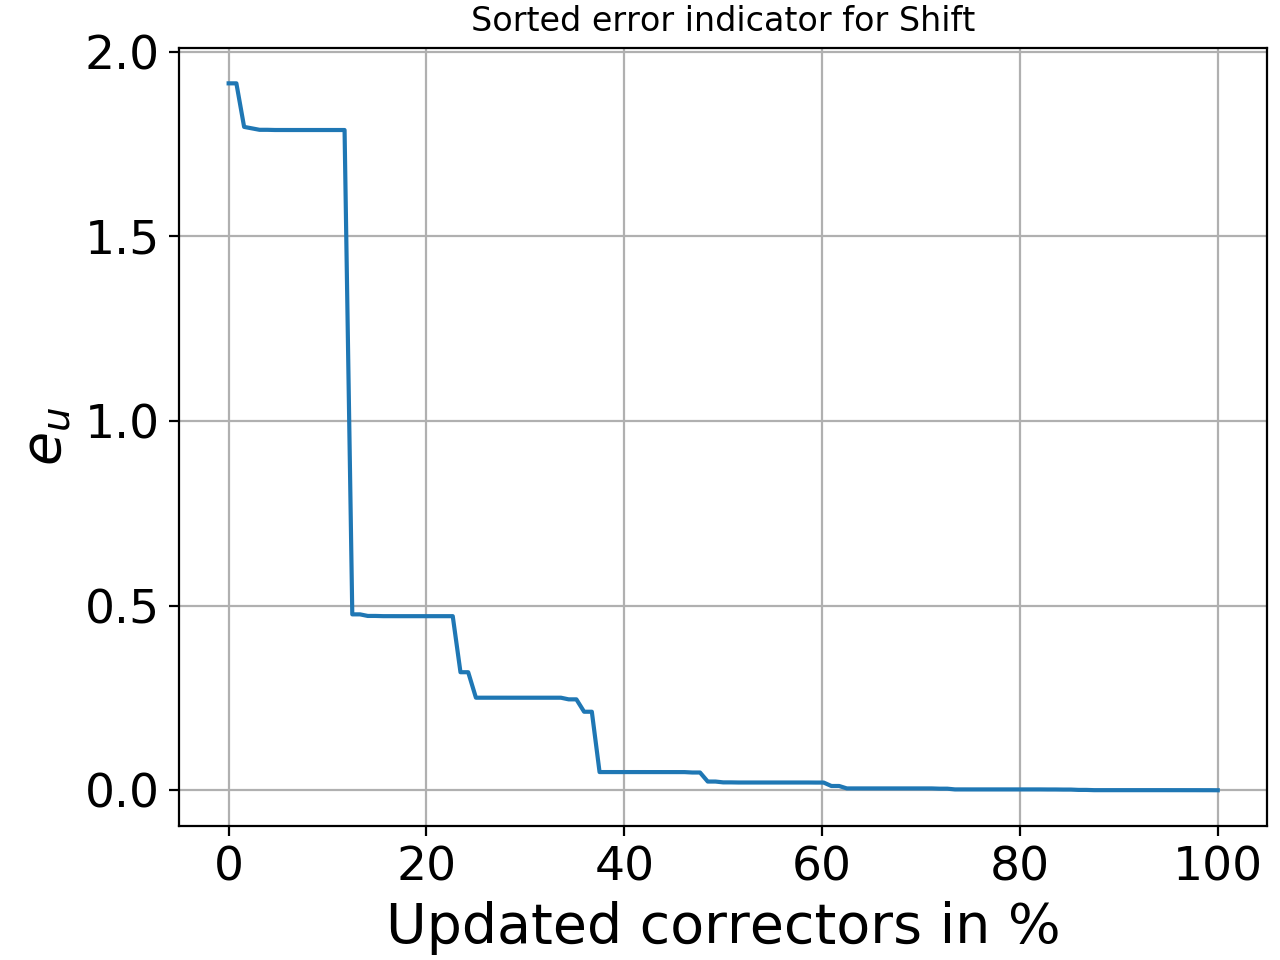

<IPython.core.display.Javascript object>


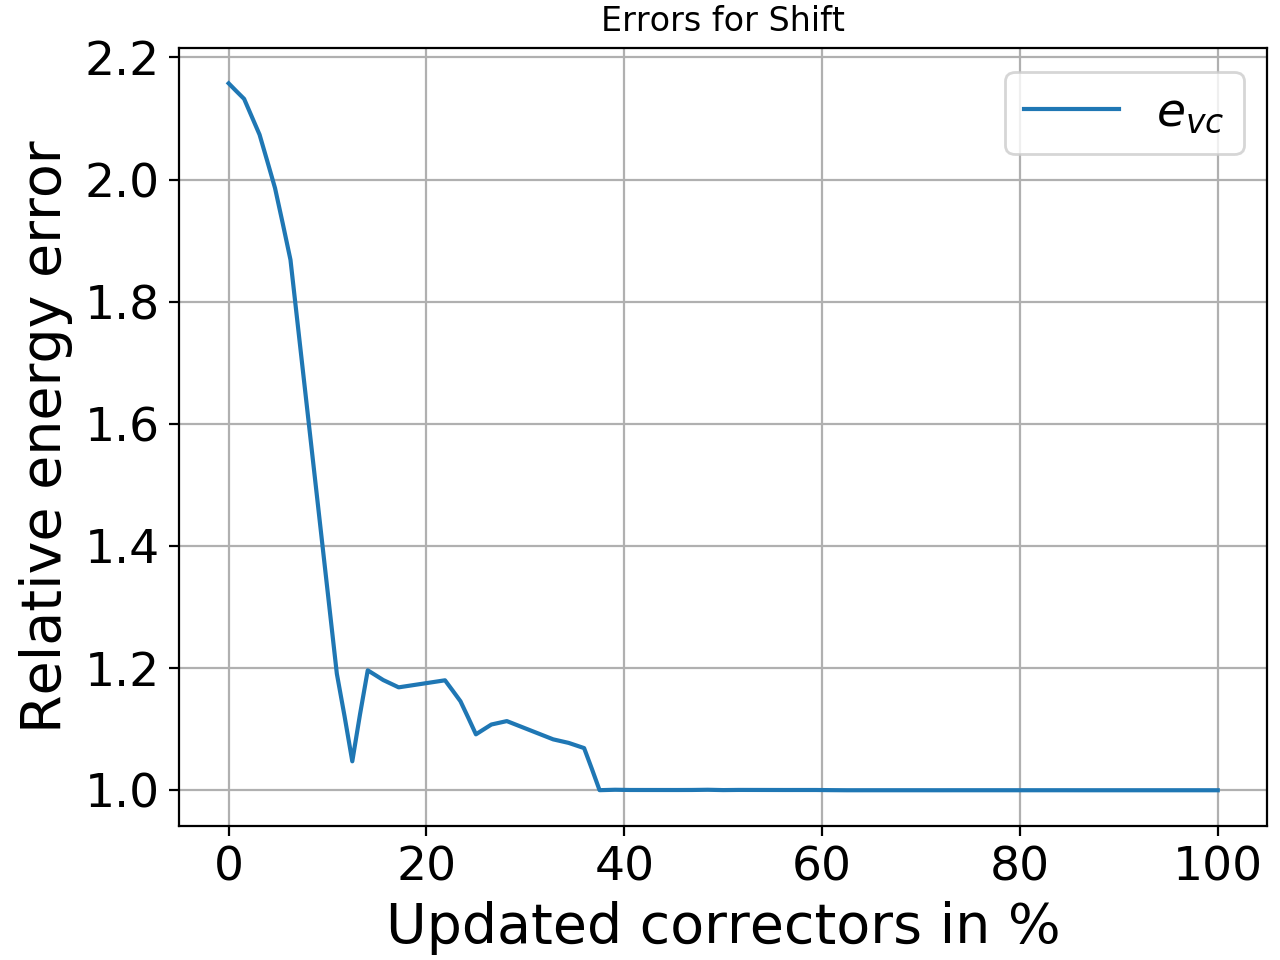

In [6]:
# Perturbation
Er = np.array([])
Er = np.append(Er,M1Base)
plt.figure("Coefficient for Shift")
drawCoefficient(NWorldFine, Er)
plt.show()

# Error indicator plot
plot_error_indicator(M1eps,M1recomputefractionsafe, NWorldCoarse, 'Shift')

# PGLOD error plot
plot_VCLOD_error(M1errorbest, M1errorworst, M1errorplotinfo, M1recomputefractionsafe,'Shift')

## Comparison

<IPython.core.display.Javascript object>


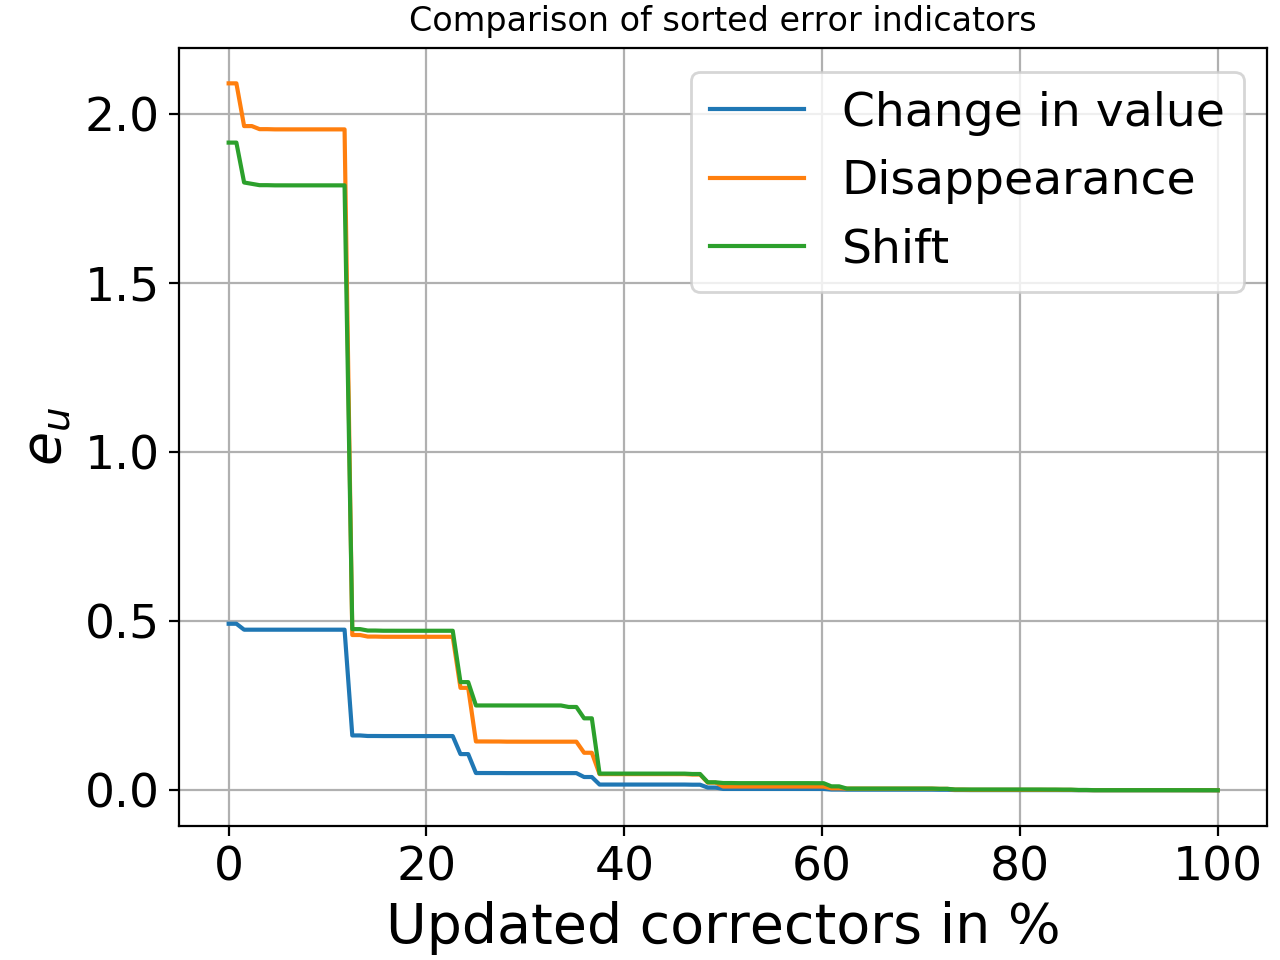

<IPython.core.display.Javascript object>


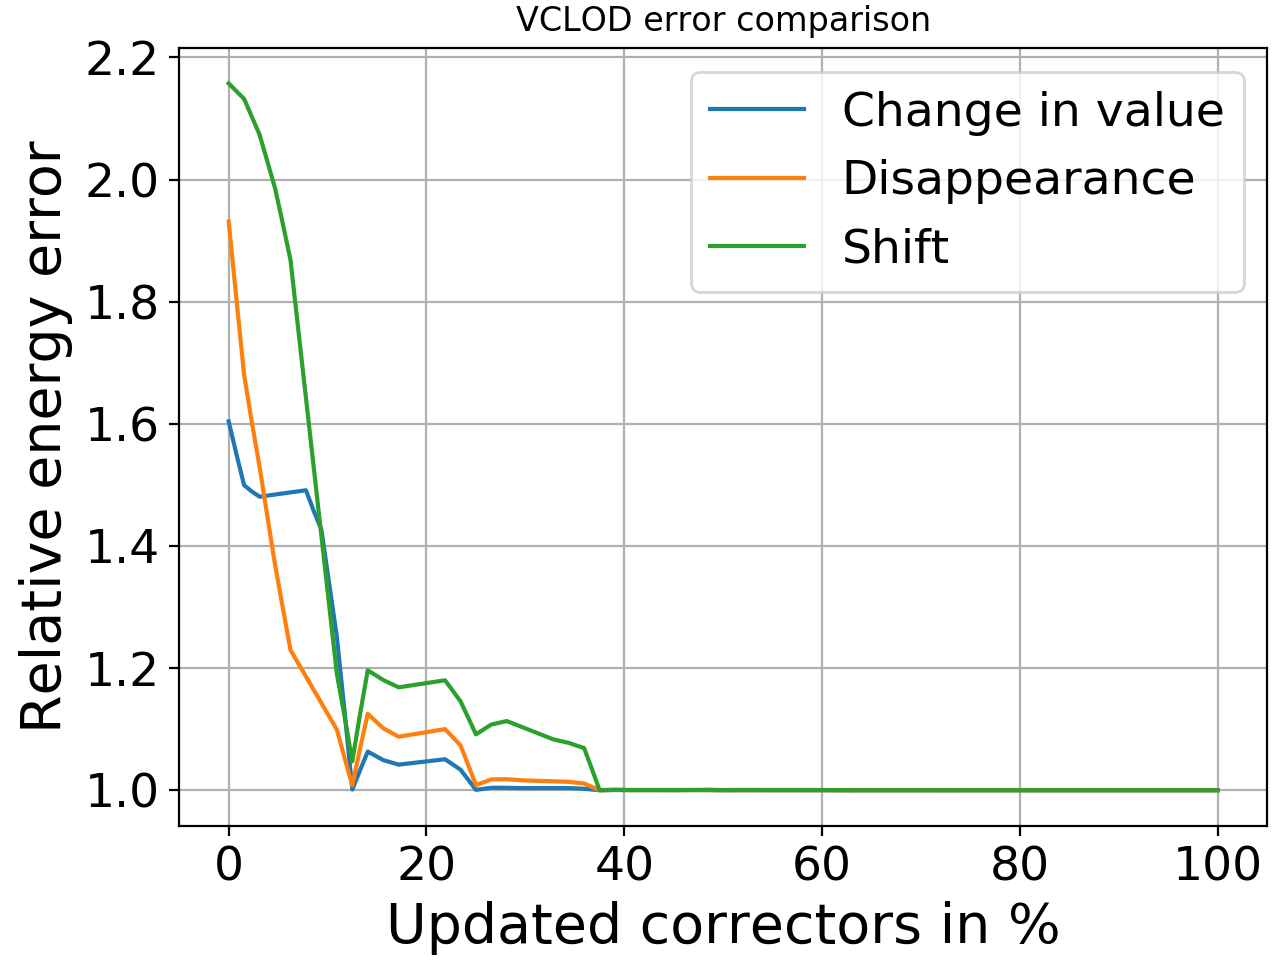

In [7]:
# indicator
plot_error_indicator_all(C1eps,C1recomputefractionsafe, NWorldCoarse,'Change in value')
plot_error_indicator_all(Veps,Vrecomputefractionsafe, NWorldCoarse, 'Disappearance')
plot_error_indicator_all(M1eps,M1recomputefractionsafe, NWorldCoarse, 'Shift')

# PGLOD error
plot_VCLOD_error_all(C1errorbest, C1errorworst, C1errorplotinfo, C1recomputefractionsafe,'Change in value')
plot_VCLOD_error_all(Verrorbest, Verrorworst, Verrorplotinfo, Vrecomputefractionsafe,'Disappearance')
plot_VCLOD_error_all(M1errorbest, M1errorworst, M1errorplotinfo, M1recomputefractionsafe,'Shift')